# IQ, Nobel prizes and Outliers
### Malcolm Gladwell - Chapter 2

In Chapter 2 of Outliers, Malcolm Gladwell writes about IQ. His argument, against common belief, is that to be successful it is only necessary to cross a threshold. E.g., as long as your IQ is above 130, you have the required smarts to win a Nobel prize. Having an IQ that's higher (such as 140, or even 170) does not help.

He compares this to basketball, where to be a good player one needs to be at least 6"2, but at some point taller is not better.

Some evidence of these claims come from looking at the universities attended by recent Nobel prize laureates, and while a few come from Harvard, most come from good but not the most elite schools, such as UPenn or the University of Michigan, along with references to papers I admittedly did not read.

In this notebook I want to use a simple model to demonstrate another explanation for the observed phenomenon that not all Nobel prize winners went to Harvard or have an IQ above 160. This explanation might well be refuted by other papers that I am not aware of, but even then I think it's a useful thought experiment, and I wished this aspect was discussed in the book.

The main idea is the following: suppose there is no threshold effect, and indeed a higher IQ does improve the quality of your research, or being taller does make you a better basketball player ad infinitum. Then, due to additional randomness, we still expect to see the top performers, i.e. the Nobel prize winners, to have a good but not exceptional IQ. Why? Because there are a lot more people with an IQ of around 140, than there are with an IQ of around 150, and even fewer with an IQ around 160. By chance and their sheer number, the "best" 140 IQer is as likely, or more likely, to be a Nobel prize winner than a 170 IQer.

However, if you care about winning a Nobel prize, you are still much better off having an IQ of 170 rather than 140.

The same reasoning can apply to basketball: there are many more potential stars that are 6"2 than 6"10, and thus basketball players are tall, but teams are not filled with 6"10 players, simply because there are not enough.

A quick note on randomness: with this I mean all the other aspects that also influence outcomes. For example, having good teachers, or professors that have good connections, etc.

So now lets use a simple simulation to see the effect, and for this example I'll use IQ as the running example. We create a population of 1M people, and each has an IQ drawn from a Normal distribution, based on [this information](https://www.123test.com/interpretation-of-an-iq-score/). Then we find a way to bestow a 100 fictional Nobel prizes to the most deserving individuals.

To find the most deserving individiuals, we give each individual in the population a score with IQ as expected value, but with added randomness that models other relevant factors. The 100 individuals with the highest scores receive the Nobel prize.
In this case, would you be a part of the population and interested in receiving a Nobel prize, you definitely want to be born with as large of an IQ as possible.

Let's look at the distribution of Nobel prize winners.

In [1]:
library(tidyverse)
options(repr.plot.width=4, repr.plot.height=3)

set.seed(42)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


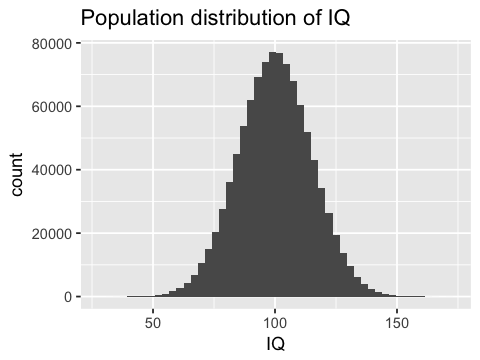

In [2]:
# A population is born
population = 1e6

iq.sd = rnorm(population, 0, 1)
to_iq = function(iq.sd) {100 + 15 * iq.sd}

data = tibble(iq=to_iq(iq.sd),
              score = iq.sd + rnorm(population)) %>%
    mutate(iq_rank = percent_rank(iq),
           score_rank = percent_rank(score),
           iq_bucket = cut_interval(iq, length=10),
           is_top = 1*(1-score_rank < 100/population))

qplot(to_iq(iq.sd), bins=50, xlab="IQ", main="Population distribution of IQ")

In [3]:
head(data)

iq,score,iq_rank,score_rank,iq_bucket,is_top
120.56438,0.1012984,0.9145419,0.5283235,"(120,130]",0
91.52953,-0.5697923,0.2859593,0.3434463,"(90,100]",0
105.44693,0.8608033,0.6410476,0.7285707,"(100,110]",0
109.49294,-0.1520070,0.7359467,0.4567195,"(100,110]",0
106.06402,0.3248318,0.6563057,0.5904496,"(100,110]",0
98.40813,1.3043944,0.4569795,0.8224228,"(90,100]",0


Now first look at the 100 individuals with the highest IQ.
We find that to make the list, one needs an IQ over 155, and the mean IQ is close to 160.
The very smartest individual has an IQ of around 172.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  155.3   156.6   158.4   159.5   161.2   172.3 

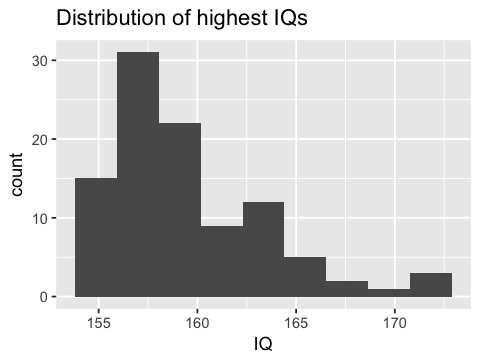

In [4]:
top_iq = top_n(data, 100, iq)

ggplot(top_iq) + 
    geom_histogram(aes(x=iq), bins=9) +
    labs(title="Distribution of highest IQs", x="IQ")

summary(top_iq$iq)

When we look at the relationship between our Nobel score and IQ, we see a strong correlation.

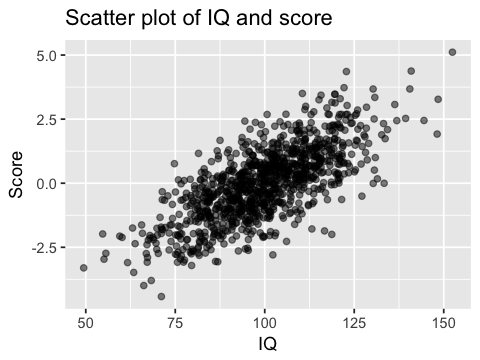

In [5]:
ggplot(head(data, 1000)) + 
    geom_point(aes(x=iq, y=score), alpha=0.5) + 
    labs(title="Scatter plot of IQ and score", x="IQ", y="Score")

For the interesting part, let us bestow a 100 Nobel prizes and look at the lucky winners.
The distribution looks very different. 
Yes, there is a Nobel prize winner with an IQ close to 170, but also a Nobel prize winner with an IQ of "only" 119.
The mean IQ is 143, which is almost 20 points lower than the average of the top 100 individuals with highest IQ.

This seems to align very well with the observations by Malcolm Gladwell.
Yes, there are some supersmart Nobel prize winners, those that probably went to Harvard,
but also a lot of very-smart-but-not-amazing individuals, which he would refer to as students that go to Notre Dame or UPenn.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  118.7   135.7   142.2   143.4   151.1   169.6 

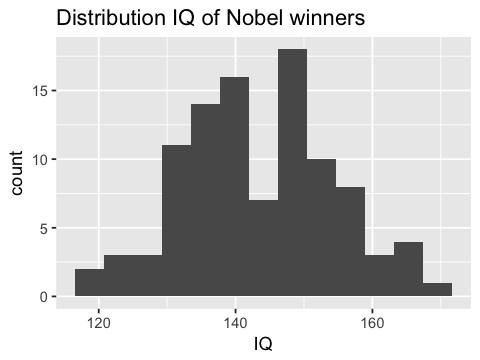

In [6]:
top_data = data %>% top_n(100, score)

ggplot(top_data) + 
    geom_histogram(aes(x=iq), bins=13) +
    labs(title="Distribution IQ of Nobel winners", x="IQ")

with(top_data, summary(iq))

If we create a table summarizing results for IQ brackets, it becomes apparent what is going on.
The columns are

  - **iq_bucket**: 
    this aggregates all individuals with a certain IQ, say between 40 and 50.
  - **bucket_size**: 
    counts how many individuals are in each bucket. There are 31 individuals with an IQ between 30 and 40.
  - **nobel_prizes**: 
    This is the number of Nobel prizes for each bucket. For example, out of all individuals with an IQ between 110 and 120, one won a Nobel prize.
  - **nobel_fraction**: 
    The fraction of individuals in the in each bucket that has won a Nobel prize. For example,
    6% of individuals with an IQ between 150 and 160 received a Nobel prize.


We see that nearly half of the individuals have an IQ between 90 and 110,
and (see above), more than half of the Nobel prize winners have an IQ less than 143. 
The bucket with most Nobel prize winners is the individuals with an IQ between 130 and 140.
However, only 0.14% of those actually received a Nobel prize.
The odds are much better for individuals with an IQ between 160 and 170,
with more than 22% receiving a Nobel prize.
This suggests that, based on IQ alone, chances of receiving a Nobel prize
are about 160 times larger than for those between 130 and 140.

In [10]:
by_bucket = data %>% group_by(iq_bucket) %>% summarize(individuals = n(), 
                                           nobel_prizes = sum(is_top), 
                                           nobel_fraction = round(10000*nobel_prizes/individuals)/100)

by_bucket

iq_bucket,individuals,nobel_prizes,nobel_fraction
"[20,30]",1,0,0.00
"(30,40]",31,0,0.00
"(40,50]",396,0,0.00
"(50,60]",3482,0,0.00
"(60,70]",19103,0,0.00
"(70,80]",68277,0,0.00
"(80,90]",161229,0,0.00
"(90,100]",246922,0,0.00
"(100,110]",247523,0,0.00
"(110,120]",161665,1,0.00


In [22]:
data %>% group_by(is_top) %>% summarize(avg_iq = mean(iq),
                                        max_iq = max(iq),
                                        min_iq = min(iq))

is_top,avg_iq,max_iq,min_iq
0,100.0043,172.3004,29.82311
1,143.3815,169.5703,118.71522


So what do we find? While the maximum IQ in the population is around 172, the average IQ for the laureates is "only" 140 and close to 60 of the 100 Nobel prize winners have an IQ between 130 and 150. That definitely corresponds to very smart individuals, but there are more than 400 individuals with an IQ above 150!

The driver of this effect is that there are more than 22000 people with an IQ between 130 and 150. By sheer numbers they manage to claim the majority of the prizes.

Of course, the numbers depend strongly on the parameters used in the simulation, so don't read too much into those. What is important is the take-away: **the strength of the few very best can easily be outnumbered by many strong candidates.**